<img align="center" src="img/course.png" width="800">

# 16720 (B)  Object Tracking in Videos - Assignment 6
    Instructor: Kris                          TAs: Wen-Hsuan (Lead), Zen, Yan, Rawal, Paritosh, Qichen

# Instructions

This section should include the visualizations and answers to specifically highlighted questions from Q1 to Q3. This section will need to be uploaded to gradescope as a pdf and manually graded (this is a separate submission from the coding notebooks) 


1. Students are encouraged to work in groups but each student must submit their own work. Include the names of your collaborators in your write up. Code should <span style='color:red'>Not</span>  be shared or copied. Please properly give credits to others by <span style='color:red'>LISTING EVERY COLLABORATOR</span> in the writeup including any code segments that you discussed,  Please <span style='color:red'>DO NOT</span>  use external code unless permitted. Plagiarism is prohibited and may lead to failure of this course.

2.  **Start early!** This homework will take a long time to complete.
    
3. **Questions:** If you have any question, please look at Piazza first and the FAQ page for this homework.

4. All the theory question and manually graded questions should be included in a single writeup (this notebook exported as pdf or a standalone pdf file) and submitted to gradescope: pdf assignment. 

5. **Attempt to verify your implementation as you proceed:** If you don’t verify that your implementation is correct on toy examples, you will risk having a huge issue when you put everything together. We provide some simple checks in the notebook cells, but make sure you verify them on more complicated samples before moving forward. 

6. **Do not import external functions/packages other than the ones already imported in the files:** The current imported functions and packages are enough for you to complete this assignment. If you need to import other functions, please remember to comment them out after submission. Our autograder will crash if you import a new function that the gradescope server does not expect. 

7. Assignments that do not follow this submission rule will be **penalized up to 10\% of the total score**.

# Preliminaries
In this section, we will go through some of the basics of the Lucas-Kanade tracker and the Matthews-Baker tracker. The following table contains a summary of the variables used in the rest of the assignment.

![title](img/variables.png)

## Template
A template describes the object of interest (eg. a car, football) which we wish to track in a video. Traditionally, the tracking algorithm is initialized with a template, which is represented by a bounding box around the object to be tracked in the first frame of the video. For each of the subsequent frames in the video, the tracker will update its estimate of the object in the image. The tracker achieves this by updating its affine warp.

## Warps
What is a warp? An image transformation or warp $\textbf{W}$ is a function that acts on pixel coordinates $\textbf{x} = \left[u\;\;v\right]^T$
and maps pixel values from one place to another in an image $\textbf{x}' =
\left[u'\;\;v'\right]^T$. Simply put, $\textbf{W}$ maps a pixel with coordinates $\textbf{x} = \left[u\;\;v\right]^T$ to $\textbf{x}' =
\left[u'\;\;v'\right]^T$. Translation, rotation, and scaling are all examples of warps. We denote the parameters of the warp function $\textbf{W}$ by $\textbf{p}$: 

$$
\begin{gathered}
\textbf{x}'= \textbf{W}(\textbf{x};\textbf{p})
\end{gathered}
$$

## Affine Warp
An affine warp is a particular kind of warp that can include any combination of translation, scaling, and rotations. An affine warp can be represented by 6 parameters $\textbf{p} = [p_1\;p_2\;p_3\;p_4\;p_5\;p_6]^{T}$. One of the most convenient things about an affine warp is that it is linear; its action on a point with coordinates $\textbf{x} = \left[u\;\;v\right]^T$ can be described as a matrix operation by a $3 \times 3$ matrix $\textbf{W}(\textbf{p})$:,

$$
\begin{gathered}
\left[ \begin{array}{c} u' \\ v' \\ 1 \end{array} \right] = \textbf{W}(\textbf{p}) \left[
\begin{array}{c} u \\ v \\ 1 \end{array} \right]
\end{gathered}
$$

$$
\begin{gathered}
\textbf{W}(\textbf{p}) = \begin{bmatrix} 1+p_1 & p_3 & p_5 \\ p_2 & 1+p_4 & p_6 \\ 0 & 0 & 1 \end{bmatrix}
\end{gathered}
$$

Note: For convenience, when we want to refer to the warp as a function, we will use $\textbf{W}(\textbf{x};\textbf{p})$ and when we want to refer to the matrix for an affine warp, we will use $\textbf{W}(\textbf{p})$. We will use affine warp and affine transformation interchangeably.

# Theory Questions (30 pts)

Before implementing the trackers, let's study some simple problems that will be useful during the implementation first. The answers to the below questions should be relatively short, consisting of a few lines of math and text.  

## Q1.1
Assuming the affine warp model defined above, derive the expression for the $\frac{\partial \textbf{W}}{\partial \textbf{p}}$ in terms of the warp parameters $\textbf{p} = [p_1\;p_2\;p_3\;p_4\;p_5\;p_6]'$.

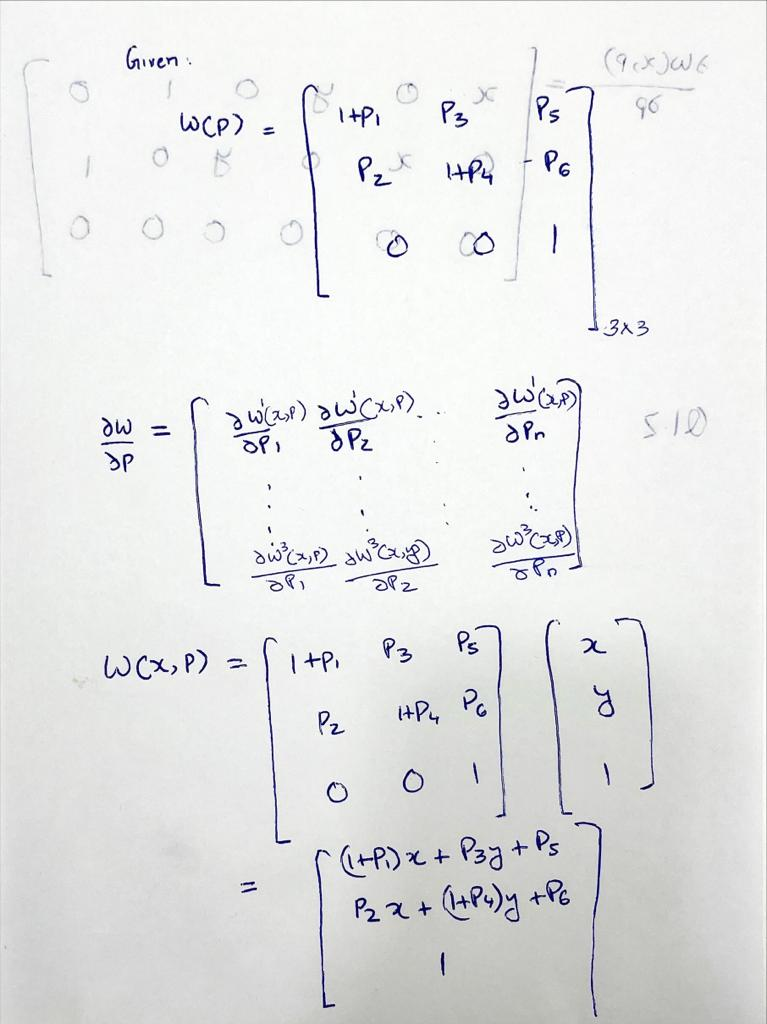

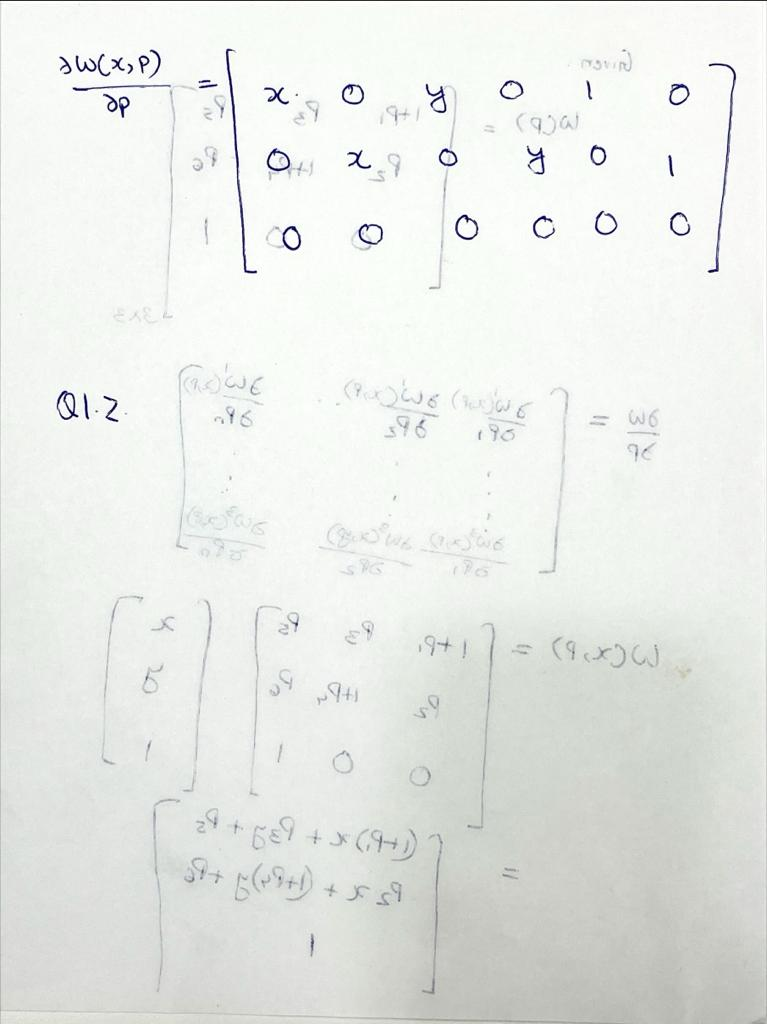

## Q1.2
Find the computational complexity (Big O notation) for each runtime iteration (computing $\textbf{J}$ and $\textbf{H}^{-1}$) of the Lucas Kanade method. Express your answers in terms of $n$, $m$ and $p$ where $n$ is the number of pixels in thetemplate $\textbf{T}$, $m$ is the number of pixels in an input image $\textbf{I}$ and $p$ is the number of parameters used to describe the warp $W$.

You may refer to the supplementary PDF for more detailed descriptions of the algorithm.

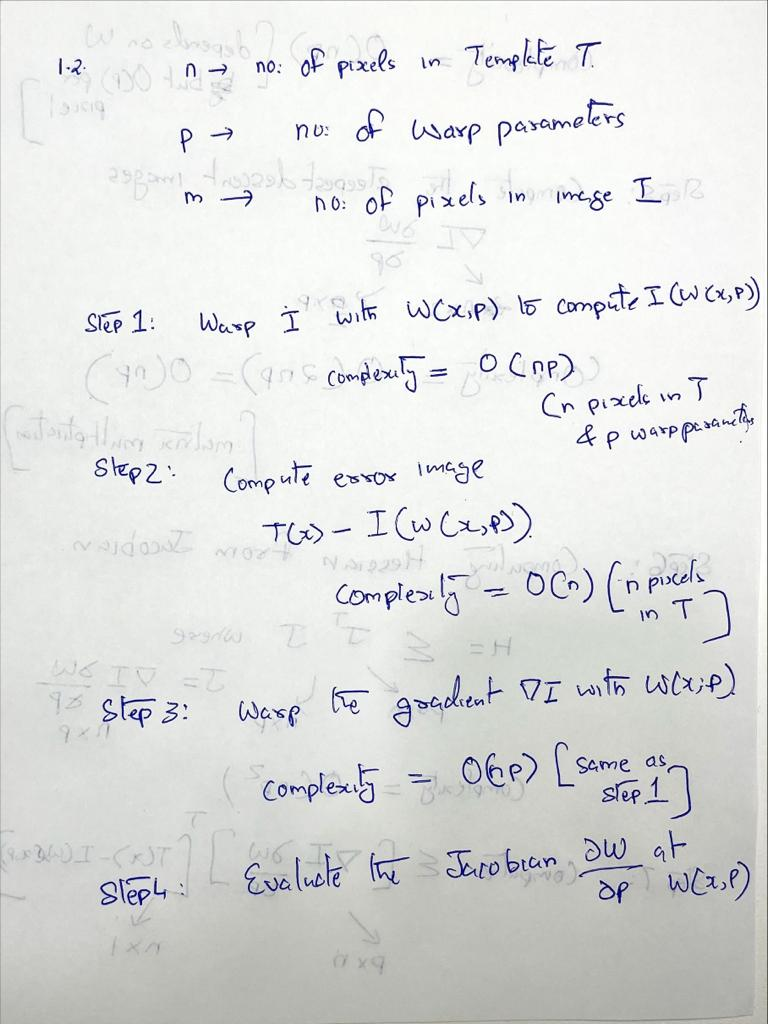

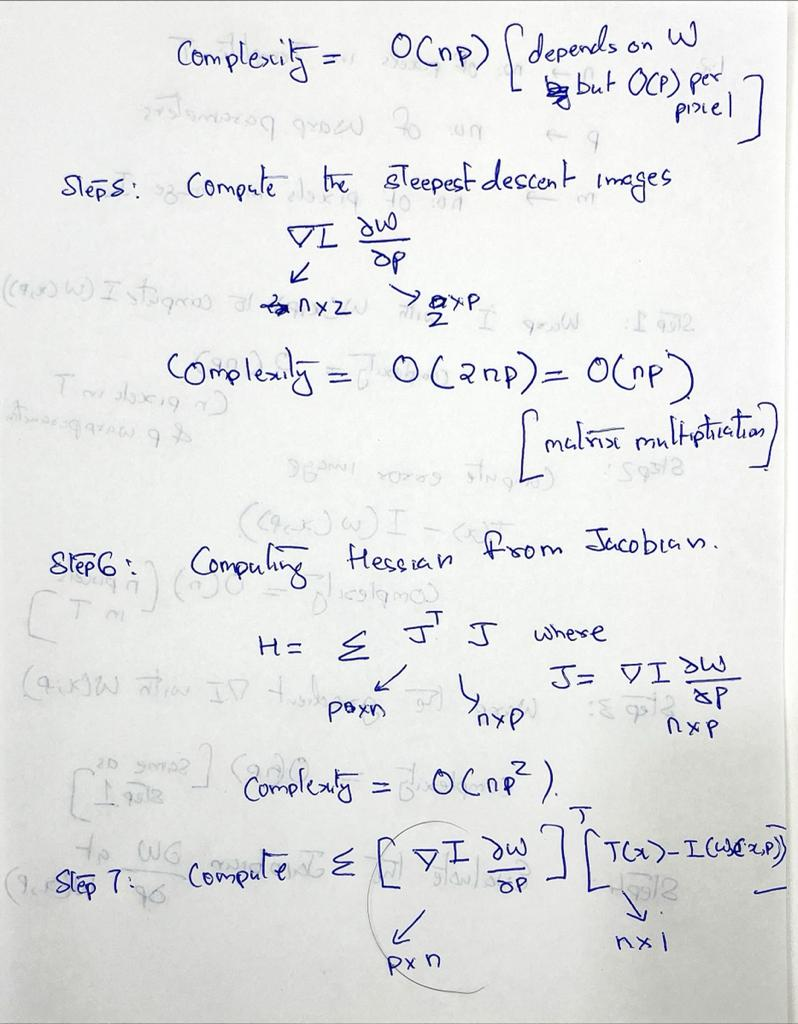

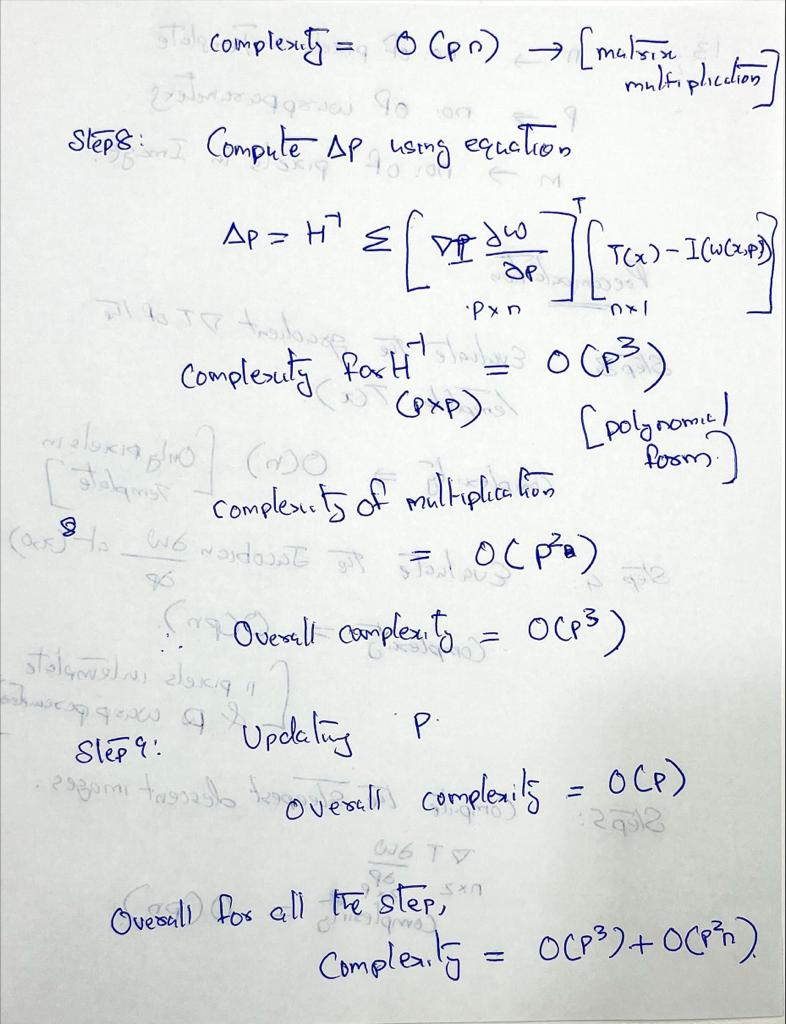

## Q1.3
Find the computational complexity (Big O notation) for the initialization step (Precomputing $\textbf{J}$ and $\textbf{H}^{-1}$) and for each runtime iteration of the Matthews-Baker method. Express your answers in terms of $n$, $m$ and $p$ where $n$ is the number of pixels in the template $\textbf{T}$, $m$ is the number of pixels in an input image $\textbf{I}$ and $p$ is the number of parameters used to describe the warp $W$. You may refer to the supplementary PDF for more detailed descriptions of the algorithm.

How does this compare to the run time of the regular Lucas-Kanade method?

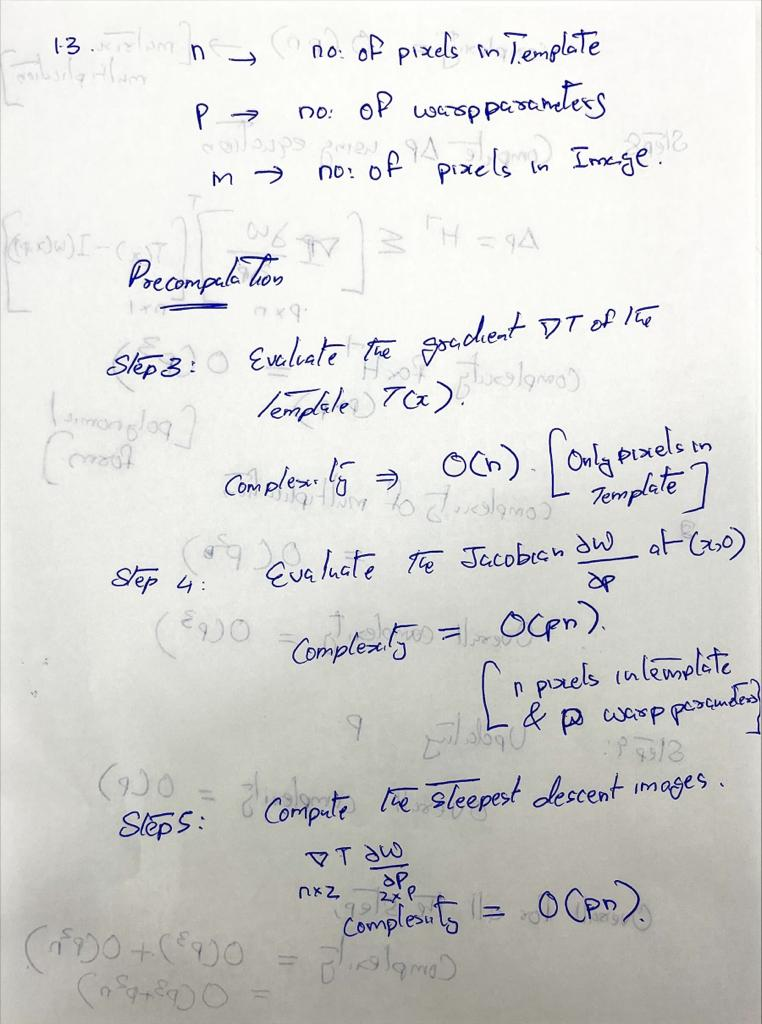

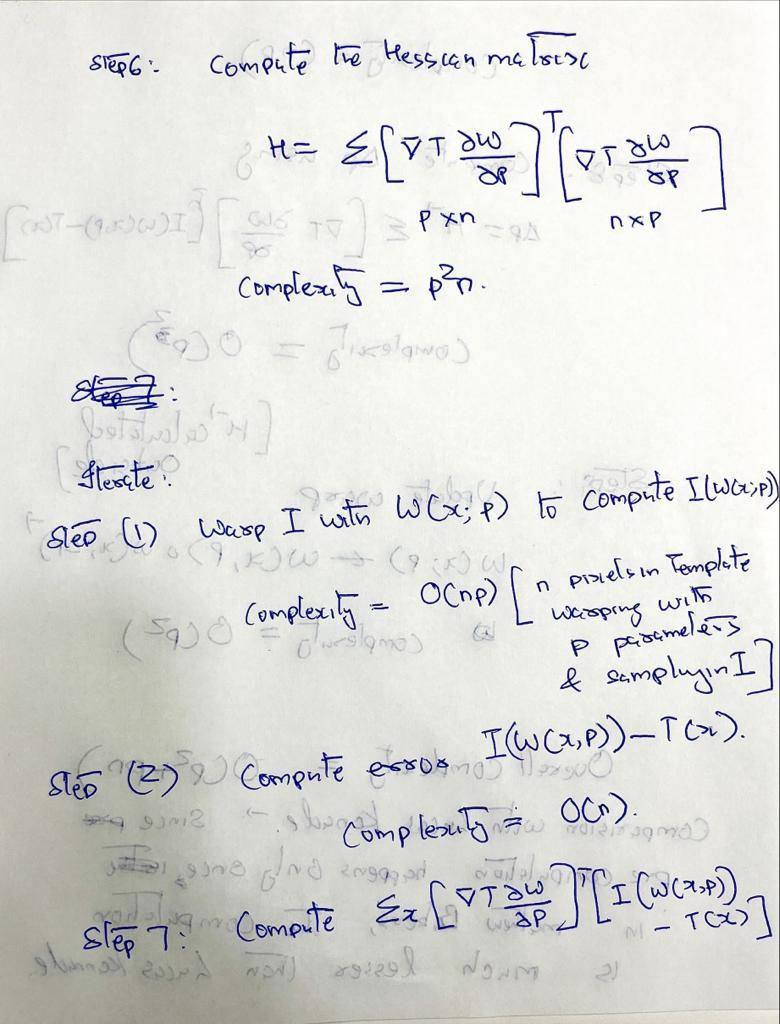

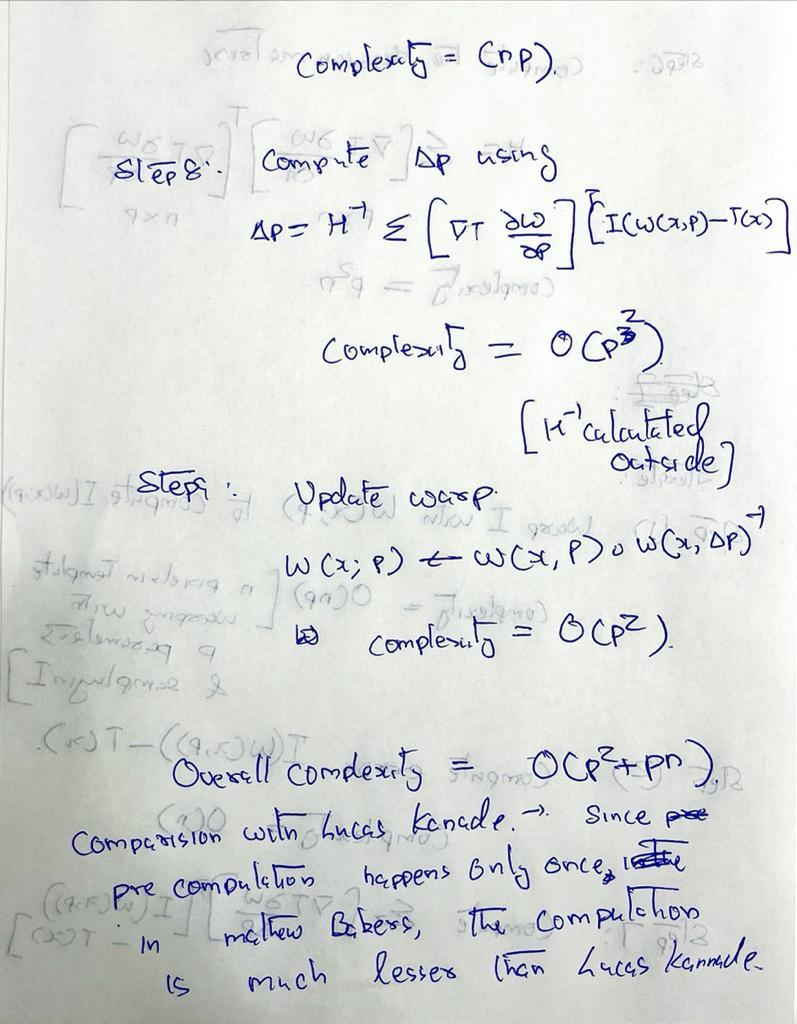

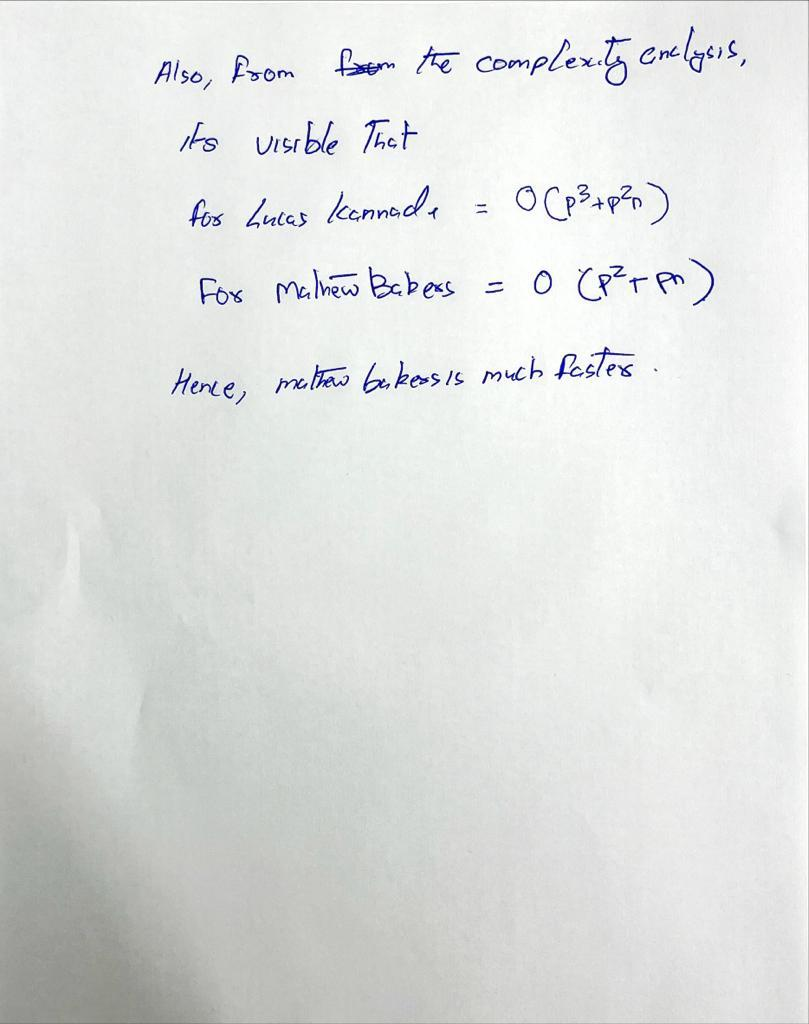

# Coding Questions Write-up

## Q1.1

### Code
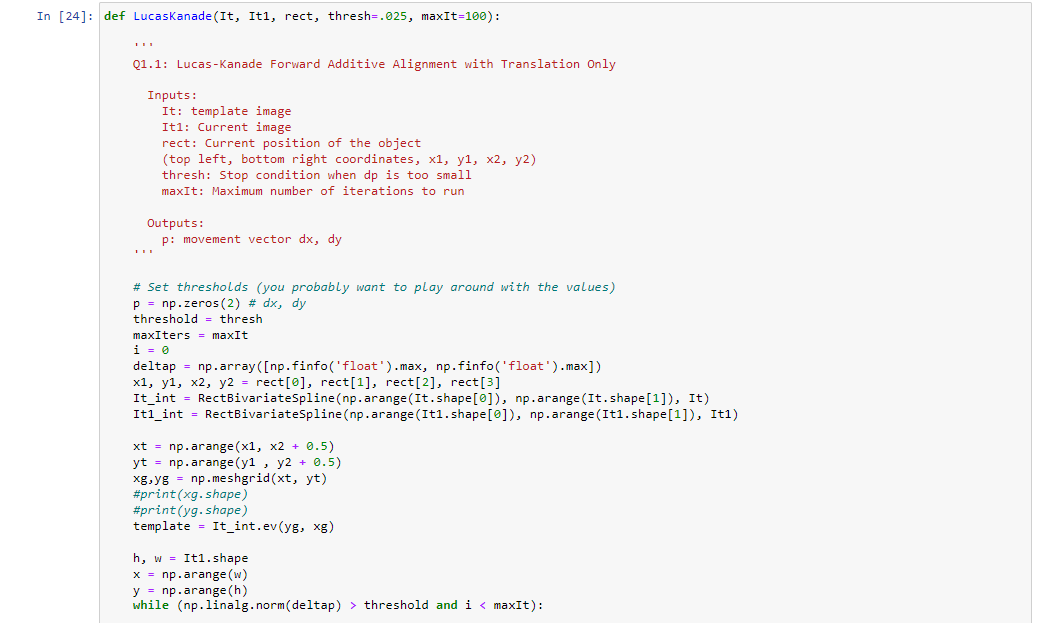
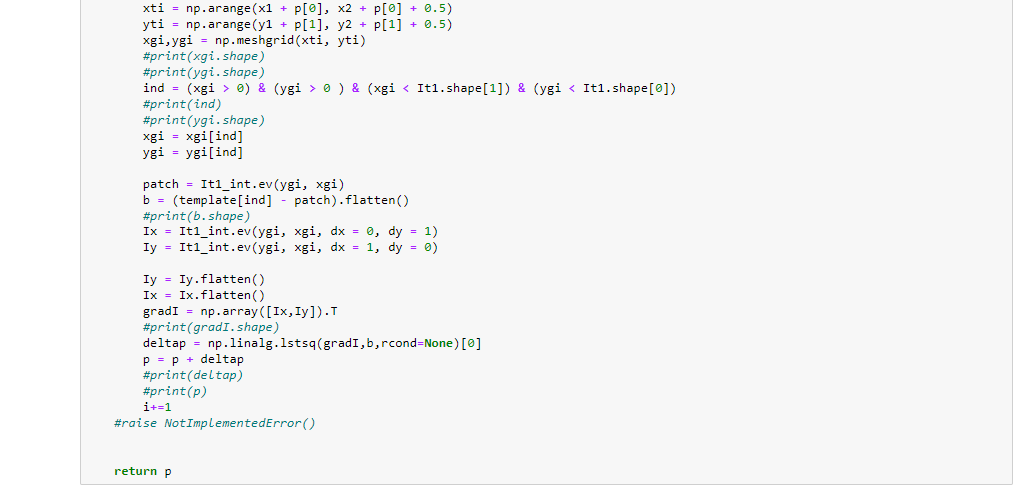

<figcaption align = "center"><b> 1) Car 1  </b></figcaption>
<table><tr>
<td><img src = "car1_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "car1_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "car1_3.png" style = "width:300px;height:300px"/></td>
</tr></table>
<table><tr>
<td><img src = "car1_4.png" style = "width:300px;height:300px"/></td>
<td><img src = "car1_5.png" style = "width:300px;height:300px"/></td>
<td><img src = "car1_6.png" style = "width:300px;height:300px"/></td>
</tr></table>

<figcaption align = "center"><b> 2) Car 2  </b></figcaption>
<table><tr>
<td><img src = "q1_1car2_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1car2_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1car2_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1car2_4.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_1car2_5.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1car2_6.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1car2_7.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1car2_8.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 3) Landing  </b></figcaption>
<table><tr>
<td><img src = "q1_1landing_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1landing_2.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_1landing_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1landing_4.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 4) Racing  </b></figcaption>
<table><tr>
<td><img src = "q1_race_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_race_2.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_race_3.png" style = "width:300px;height:300px"/></td>
</tr></table>

<figcaption align = "center"><b> 5) Ballet  </b></figcaption>
<table><tr>
<td><img src = "q1_1ballet_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_1ballet_2.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_1ballet_3.png" style = "width:300px;height:300px"/></td>
</tr></table>

## Q1.2

### Code
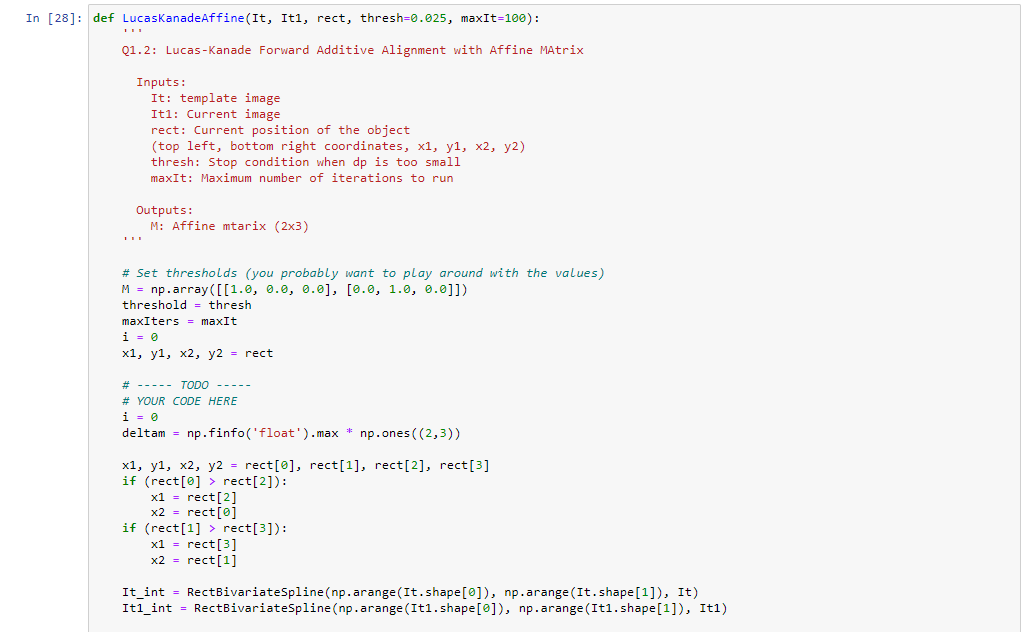
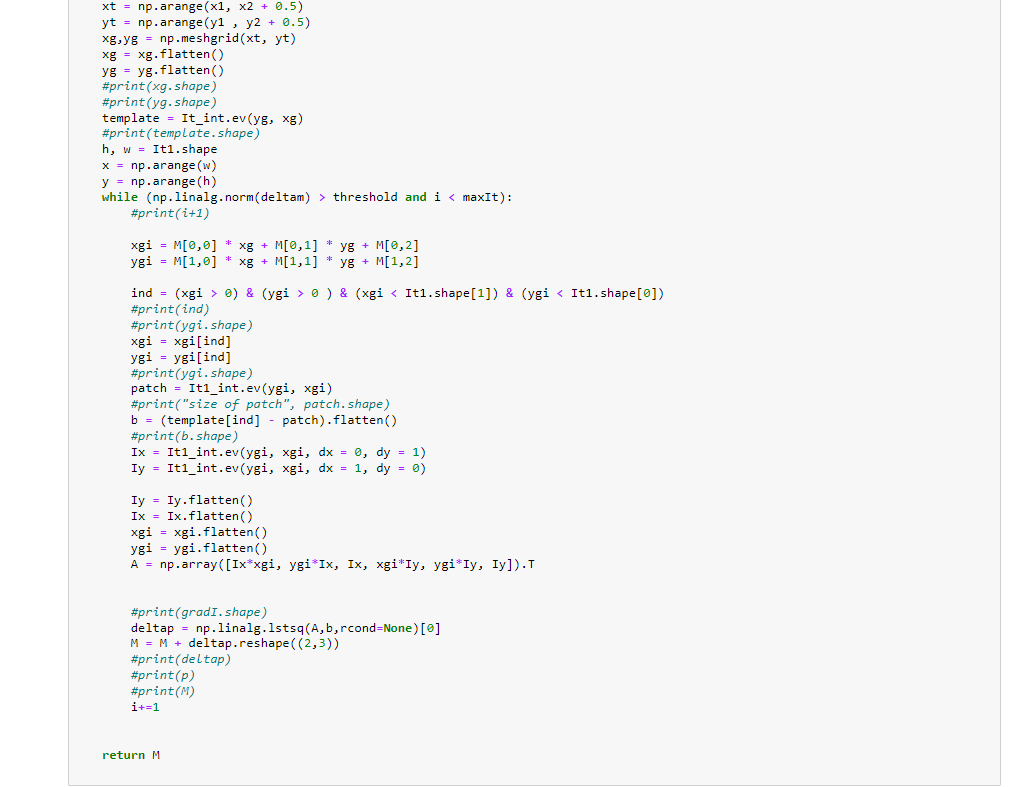

<figcaption align = "center"><b> 1) Car 1  </b></figcaption>
<table><tr>
<td><img src = "q1_2car1_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car1_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car1_3.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_2car1_4.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car1_5.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 2) Car 2  </b></figcaption>
<table><tr>
<td><img src = "q1_2car2_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car2_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car2_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car2_4.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_2car2_5.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car2_6.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2car2_7.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 3) Landing  </b></figcaption>
<table><tr>
<td><img src = "q1_2landing_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2landing_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2landing_3.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_2landing_4.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2landing_5.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 4) Racing  </b></figcaption>
<table><tr>
<td><img src = "q1_2_race_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2_race_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2_race_3.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_2_race_4.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2_race_5.png" style = "width:300px;height:300px"/></td>

    
 </tr></table>

<figcaption align = "center"><b> 5) Ballet  </b></figcaption>
<table><tr>
<td><img src = "q1_2ballet_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2ballet_2.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q1_2ballet_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q1_2ballet_4.png" style = "width:300px;height:300px"/></td>

    
 </tr></table>

## Q2.1

### Code

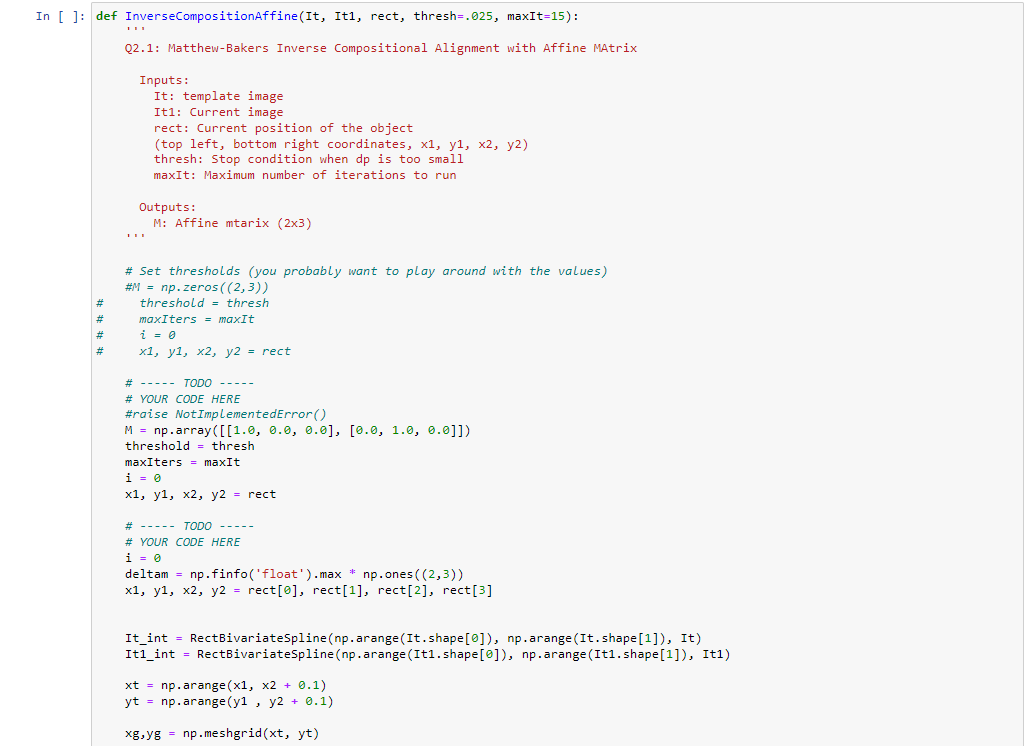
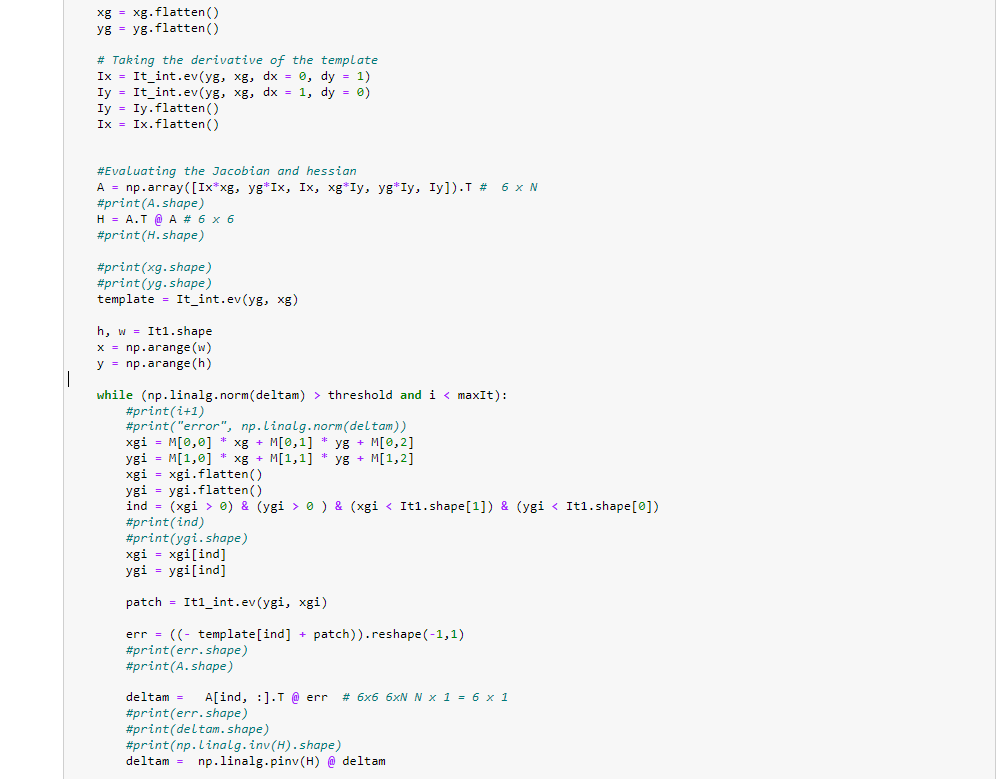
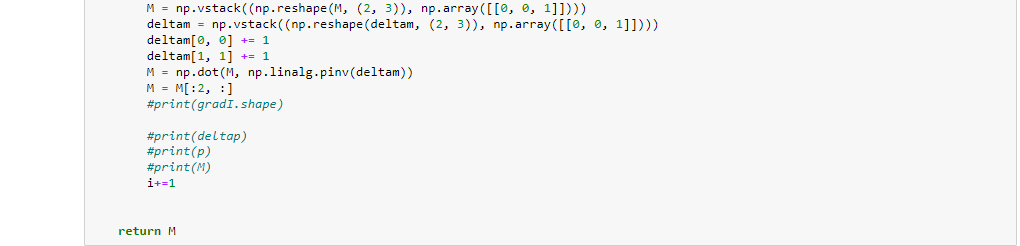

<figcaption align = "center"><b> 1) Car 1  </b></figcaption>
<table><tr>
<td><img src = "q2car1_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car1_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car1_3.png" style = "width:300px;height:300px"/></td>
</tr></table>
<table><tr>
<td><img src = "q2car1_4.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car1_5.png" style = "width:300px;height:300px"/></td>
</tr></table>

<figcaption align = "center"><b> 2) Car 2  </b></figcaption>
<table><tr>
<td><img src = "q2car2_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car2_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car2_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car2_4.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q2car2_5.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car2_6.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2car2_7.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 3) Landing  </b></figcaption>
<table><tr>
<td><img src = "q2landing_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2landing_2.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q2landing_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2landing_4.png" style = "width:300px;height:300px"/></td>

</tr></table>

<figcaption align = "center"><b> 4) Racing  </b></figcaption>
<table><tr>
<td><img src = "q2_race_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2_race_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2_race_3.png" style = "width:300px;height:300px"/></td>

</tr></table>
<table><tr>
<td><img src = "q2_race_4.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2_race_5.png" style = "width:300px;height:300px"/></td>

    
 </tr></table>

<figcaption align = "center"><b>5) Ballet  </b></figcaption>
<table><tr>
<td><img src = "q2ballet_1.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2ballet_2.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2ballet_3.png" style = "width:300px;height:300px"/></td>
<td><img src = "q2ballet_4.png" style = "width:300px;height:300px"/></td>
</tr></table>





## Q2.2

All the three algorithm work best with landing and race video as the movement of the frame is consistent and gradual, hence assuption of the lucas kannade is valid and the brightness consistency equation is not failing.

For Lucas Kannade Translation: as the there isnt much transormation parameters (2 parameters), the bounding boxes remain rectangular and error for calculating those parameters is lesser. Hence the videos with no change in size or other transformations can be efficently tracked .

For Lucas Kanade Affine, tracking for ballet and car 2 are poor as the movement of ballet and car is much higher in last few frames and this violates the assumptions of lucas kannade there by failing the brightness consistency equation.

Lucas kanade in overall is very slow because of more calculation parameters in the iteration compare to mathew bakers.

In mathew bakers, the results are similar to lucas kanade affine but a bit worse as the calculation of H inverse and double warping make it less accurate but its faster than lucas kanade. 

## Q3

YOUR ANSWER HERE